**IMPORTACIÓN DE LIBRERIAS ÚTILES PARA TODO EL CICLO**

In [ ]:
#COMANDOS INICIALES
# pip install seaborn
# pip install matplotlib
# pip install scipy

In [3]:
import pandas as pd
import numpy as ny
import seaborn as sb
import matplotlib.pyplot as mpp
import scipy.stats as ss

**Carga y Visualización de Datos**

In [68]:
# Importamos el primer DF
df_games_API = pd.read_csv('../Archivos CSV/games_API.csv')

In [69]:
# Visualización del DF importado
df_games_API

,item_id,game_genre,game_name,year_release
0,761140,Action,Lost Summoner Kitty,2018
1,761140,Casual,Lost Summoner Kitty,2018
2,761140,Indie,Lost Summoner Kitty,2018
3,761140,Simulation,Lost Summoner Kitty,2018
4,761140,Strategy,Lost Summoner Kitty,2018
...,...,...,...,...
55601,610660,Indie,Russian Roads,2018
55602,610660,Racing,Russian Roads,2018
55603,610660,Simulation,Russian Roads,2018
55604,658870,Casual,EXIT 2 - Directions,2017


In [38]:
# Importamos el segundo DF
df_items_games_API = pd.read_csv('../Archivos CSV/items_games_API.csv')

In [39]:
# Visualización del DF importado
df_items_games_API

,game_genre,year_release,playtime_forever,user_id
0,Action,2000,6,76561197970982479
1,Action,2000,0,js41637
2,Action,2000,0,Riot-Punch
3,Action,2000,93,doctr
4,Action,2000,108,corrupted_soul
...,...,...,...,...
7190751,Indie,2016,46,76561198071808318
7190752,Action,2016,164,76561198107283457
7190753,Casual,2016,164,76561198107283457
7190754,Indie,2016,164,76561198107283457


In [40]:
# Importamos el tercer DF
df_reviews_games_API = pd.read_csv('../Archivos CSV/reviews_games_API.csv')

In [41]:
# Visualización del DF importado
df_reviews_games_API

,user_id,year_posted,item_id,recommend,analisis_sentimiento,game_genre,game_name,year_release
0,76561197970982479,2011,1250,1,2,Action,Killing Floor,2009
1,death-hunter,2015,1250,1,2,Action,Killing Floor,2009
2,DJKamBer,2013,1250,1,0,Action,Killing Floor,2009
3,diego9031,2015,1250,1,1,Action,Killing Floor,2009
4,76561198081962345,2014,1250,1,1,Action,Killing Floor,2009
...,...,...,...,...,...,...,...,...
99034,Gamer0009,2015,306040,1,2,Simulation,The Howler,2016
99035,Gamer0009,2015,306040,1,2,Strategy,The Howler,2016
99036,llDracuwulf,2015,307130,1,2,Action,Asteria,2014
99037,llDracuwulf,2015,307130,1,2,Adventure,Asteria,2014


**GRAFICACIÓN DE DATOS**

In [70]:
# Convertimos todos los datos necesarios a Numeric
# De df_games_API
df_games_API['item_id'] = pd.to_numeric(df_games_API['item_id'])
df_games_API['year_release'] = pd.to_numeric(df_games_API['year_release'])

# De df_items_games_API
df_items_games_API['year_release'] = pd.to_numeric(df_items_games_API['year_release'])
df_items_games_API['playtime_forever'] = pd.to_numeric(df_items_games_API['playtime_forever'])

# De df_reviews_games_API
df_reviews_games_API['year_posted'] = pd.to_numeric(df_reviews_games_API['year_posted'])
df_reviews_games_API['item_id'] = pd.to_numeric(df_reviews_games_API['item_id'])
df_reviews_games_API['recommend'] = pd.to_numeric(df_reviews_games_API['recommend'])
df_reviews_games_API['analisis_sentimiento'] = pd.to_numeric(df_reviews_games_API['analisis_sentimiento'])
df_reviews_games_API['year_release'] = pd.to_numeric(df_reviews_games_API['year_release'])


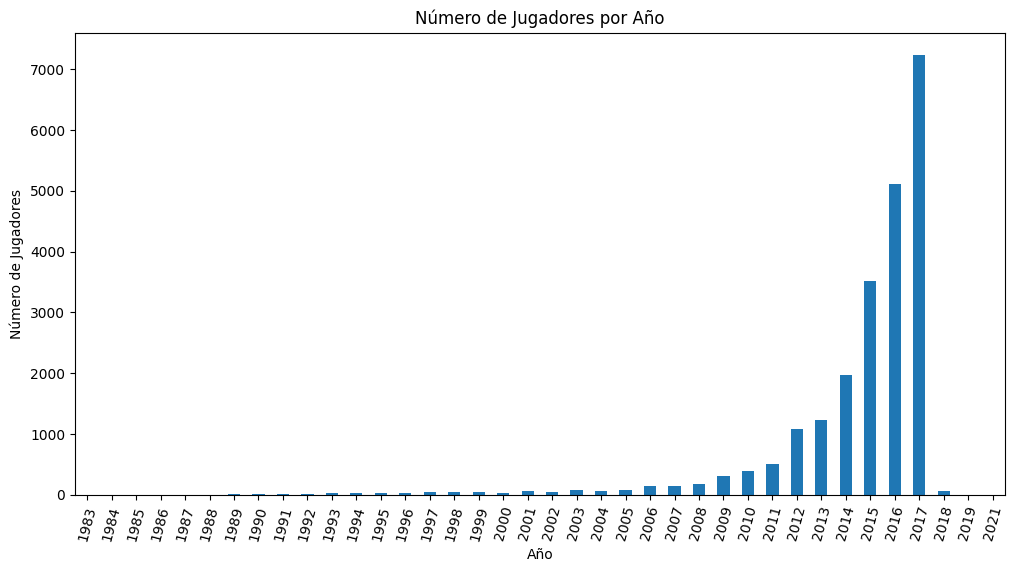

In [76]:
# NÚMERO DE JUGADORES POR AÑO
players_x_year = df_games_API.groupby('year_release')['item_id'].nunique()

# Creamos el gráfico
mpp.figure(figsize=(12, 6))
players_x_year.plot(kind='bar')
mpp.title('Número de Jugadores por Año')
mpp.xlabel('Año')
mpp.ylabel('Número de Jugadores')
mpp.xticks(rotation=75)
mpp.show()

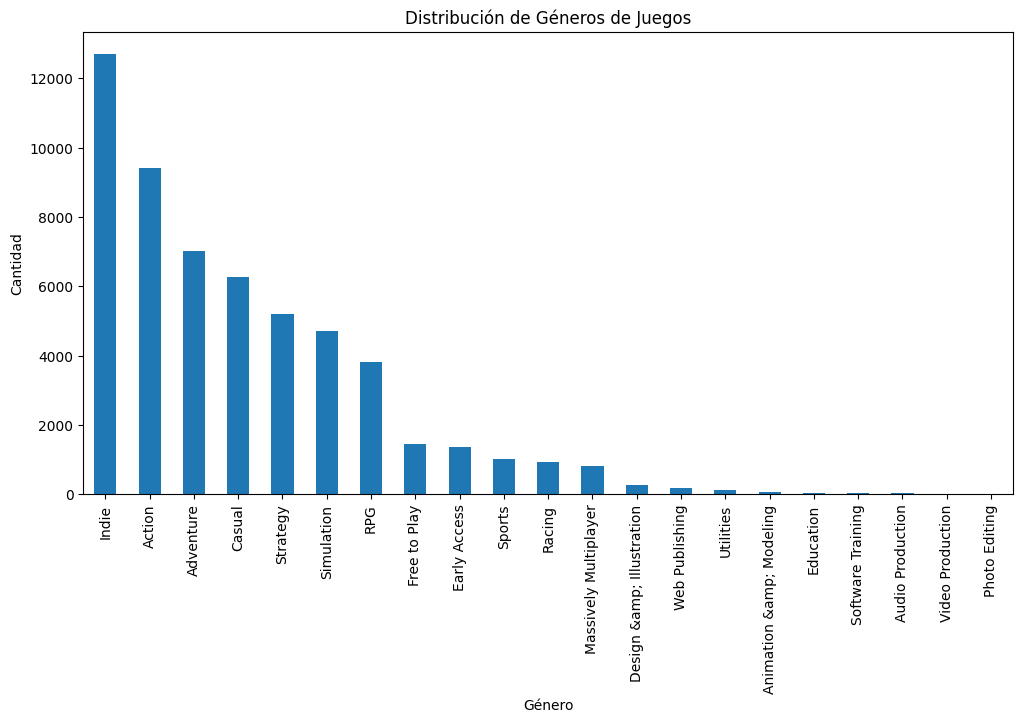

In [72]:
# DISTRIBUCIÓN POR CANTIDAD DE LOS GÉNEROS VISUALIZADOS
genre_count = df_games_API['game_genre'].value_counts()

# Creamos el gráfico
mpp.figure(figsize=(12, 6))
genre_count.plot(kind='bar')
mpp.title('Distribución de Géneros de Juegos')
mpp.xlabel('Género')
mpp.ylabel('Cantidad')
mpp.xticks(rotation=90)
mpp.show()

<Figure size 1200x600 with 0 Axes>

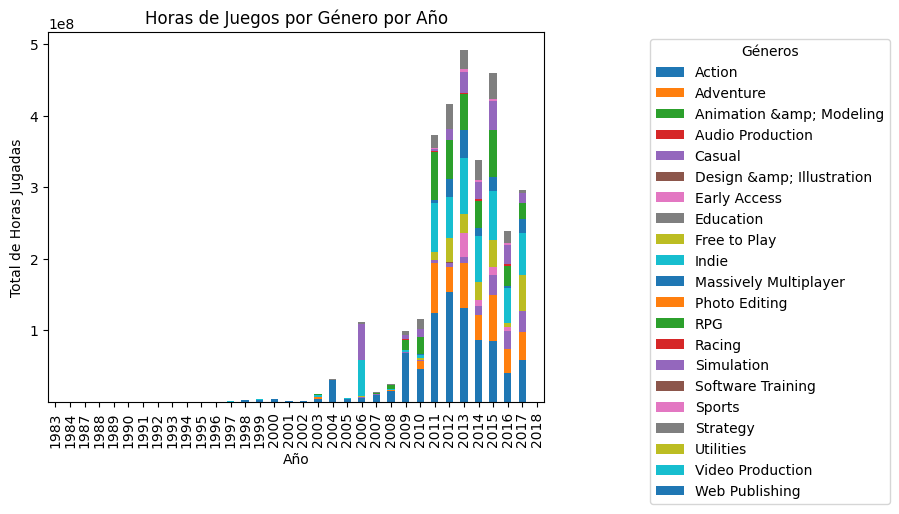

In [83]:
# Playtime por año, filtrado por géneros
genre_playtime = df_items_games_API.groupby(['year_release', 'game_genre'])['playtime_forever'].sum().unstack()

# Creamos el gráfico
mpp.figure(figsize=(12, 6))
genre_playtime.plot(kind='bar', stacked=True)
mpp.title('Horas de Juegos por Género por Año')
mpp.xlabel('Año')
mpp.ylabel('Total de Horas Jugadas')
mpp.xticks(rotation=90)
mpp.legend(title='Géneros', bbox_to_anchor=(1.20, 1), loc='upper left')
mpp.show()

In [84]:
# Visualizamos el DF
df_reviews_games_API

,user_id,year_posted,item_id,recommend,analisis_sentimiento,game_genre,game_name,year_release
0,76561197970982479,2011,1250,1,2,Action,Killing Floor,2009
1,death-hunter,2015,1250,1,2,Action,Killing Floor,2009
2,DJKamBer,2013,1250,1,0,Action,Killing Floor,2009
3,diego9031,2015,1250,1,1,Action,Killing Floor,2009
4,76561198081962345,2014,1250,1,1,Action,Killing Floor,2009
...,...,...,...,...,...,...,...,...
99034,Gamer0009,2015,306040,1,2,Simulation,The Howler,2016
99035,Gamer0009,2015,306040,1,2,Strategy,The Howler,2016
99036,llDracuwulf,2015,307130,1,2,Action,Asteria,2014
99037,llDracuwulf,2015,307130,1,2,Adventure,Asteria,2014


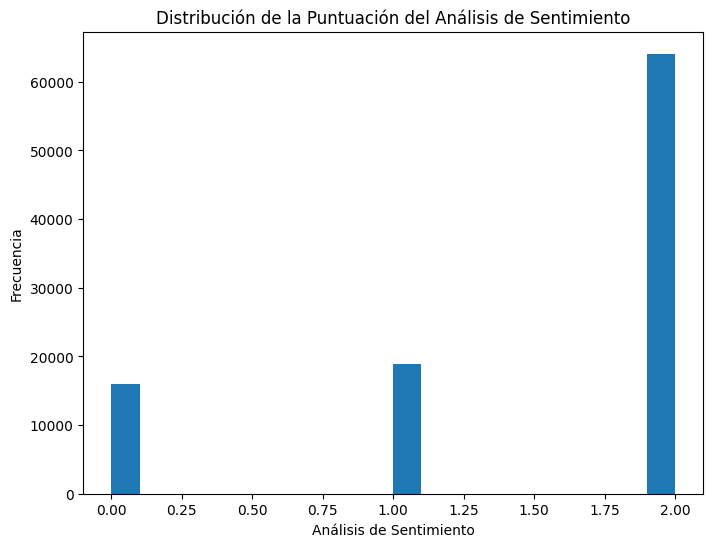

In [85]:
# Distribución del Análisis de Sentimiento generado y creación de gráfico
mpp.figure(figsize=(8, 6))
df_reviews_games_API['analisis_sentimiento'].plot(kind='hist', bins=20)
mpp.title('Distribución de la Puntuación del Análisis de Sentimiento')
mpp.xlabel('Análisis de Sentimiento')
mpp.ylabel('Frecuencia')
mpp.show()